# Notebook with hidden cell to secure credentials
* Old notebook from early 2016
* Migrated from Bluemix Apache Spark service to 

In [16]:
!wget -O $HOME/.local/lib/python2.7/site-packages/ibmdbpy/db2jcc4.jar https://ibm.box.com/shared/static/lmhzyeslp1rqns04ue8dnhz2x7fb6nkc.zip
!pip show ibmdbpy

--2016-05-31 04:49:32--  https://ibm.box.com/shared/static/lmhzyeslp1rqns04ue8dnhz2x7fb6nkc.zip
Resolving ibm.box.com (ibm.box.com)... 107.152.24.197, 74.112.184.85, 74.112.185.182
Connecting to ibm.box.com (ibm.box.com)|107.152.24.197|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/lmhzyeslp1rqns04ue8dnhz2x7fb6nkc.zip [following]
--2016-05-31 04:49:32--  https://ibm.app.box.com/shared/static/lmhzyeslp1rqns04ue8dnhz2x7fb6nkc.zip
Resolving ibm.app.box.com (ibm.app.box.com)... 74.112.184.87, 74.112.185.87, 107.152.24.199
Connecting to ibm.app.box.com (ibm.app.box.com)|74.112.184.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/9n7BBQf5RRkdxmDtCQvfwOfBJNeLAYHLeBPwWPHb7mxfNS4nOgLIhIkTLgH2Pp_pP7nCp0XSiXFzzVdXPeqppVieu_0anPEOC2jsShRJlNDrH-IvNjH32HTZISM8M9ys6N2hVJsCFRuyGacy1Yp4hQVfgCax8KgB0NYh4m609FaxCtyN-gQPtGqJ3VcLQW03FOODIyK2lpClDvbKoJVtjPM8QIEYqQmscUlJyD5VV1ipY

In [20]:
import requests, StringIO, pandas as pd, json, re
from pyspark.sql import SQLContext
from ibmdbpy import IdaDataBase, IdaDataFrame
import pyowm
import jaydebeapi

In [24]:
# The code was removed by DSX for sharing.

In [25]:
jdbc=credentials['jdbcurl']+":user="+credentials['username']+";password="+credentials['password']
idadb=IdaDataBase(dsn=jdbc)

In [26]:
visitor_query='select v.year,v.visitors1,sum(w.precip_hieght) as rain,sum(w.sunshine_duration) as sun,max(w.temp_max) as tmax,min(w.temp_min) as tmin from '+credentials['username']+ "."     +"CEBIT_VISITORS as v,"+credentials['username'] + ".WEATHER_HANNOVER w where v.year<2016"+      " and w.mdate between v.begin and v.end group by v.year,v.visitors1"
weather_query="(select w.mdate,w.sunshine_duration as sun,w.precip_hieght as rain,w.temp_max as tmax,w.temp_min as tmin from "+credentials['username'] + "." + "CEBIT_VISITORS as v,"+credentials['username'] + ".WEATHER_HANNOVER w where w.mdate between v.begin and v.end and v.year<2016 order by w.mdate asc)"
visitor_df=idadb.ida_query(visitor_query)
weather_df=idadb.ida_query(weather_query)

In [27]:
weather_df.columns

Index([u'MDATE', u'SUNSHINE_DURATION', u'PRECIP_HIEGHT', u'TEMP_MAX', u'TEMP_MIN'], dtype='object')

In [28]:
%matplotlib inline 

CeBIT visitors by year:


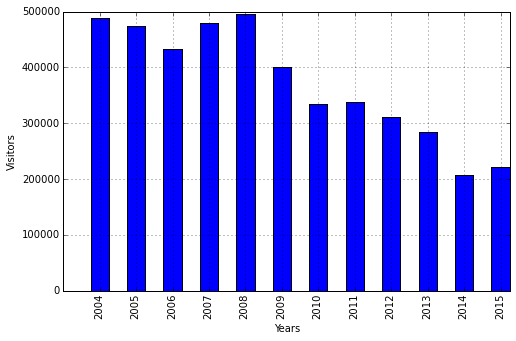

In [29]:
print "CeBIT visitors by year:"
ax = visitor_df.plot(kind='bar', figsize=(8,5), x='YEAR', y='VISITORS1')
ax.set_ylabel("Visitors")
ax.set_xlabel("Years");

Basic weather data for past CeBIT days


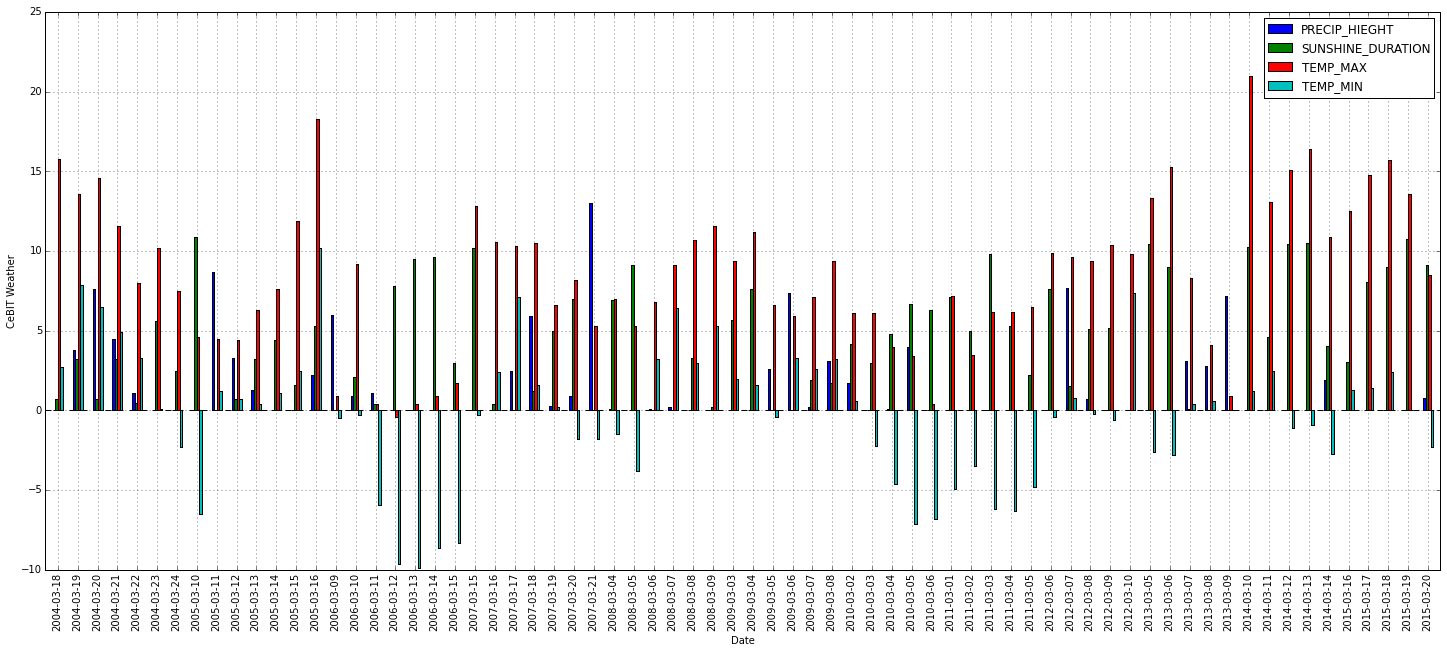

In [9]:
print "Basic weather data for past CeBIT days"
wdf1=weather_df[['MDATE','PRECIP_HIEGHT','SUNSHINE_DURATION','TEMP_MAX','TEMP_MIN']]
ax2 = wdf1.plot(kind='bar', figsize=(25,10), x='MDATE' )
ax2.set_ylabel("CeBIT Weather")
ax2.set_xlabel("Date")

Our final plot shows the visitor and weather data in context - any relationship?


/usr/local/src/bluemix_ipythonspark_16/notebook-2.7/lib/python2.7/site-packages/ipython-3.2.1-py2.7.egg/IPython/kernel/__main__.py:3: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  app.launch_new_instance()


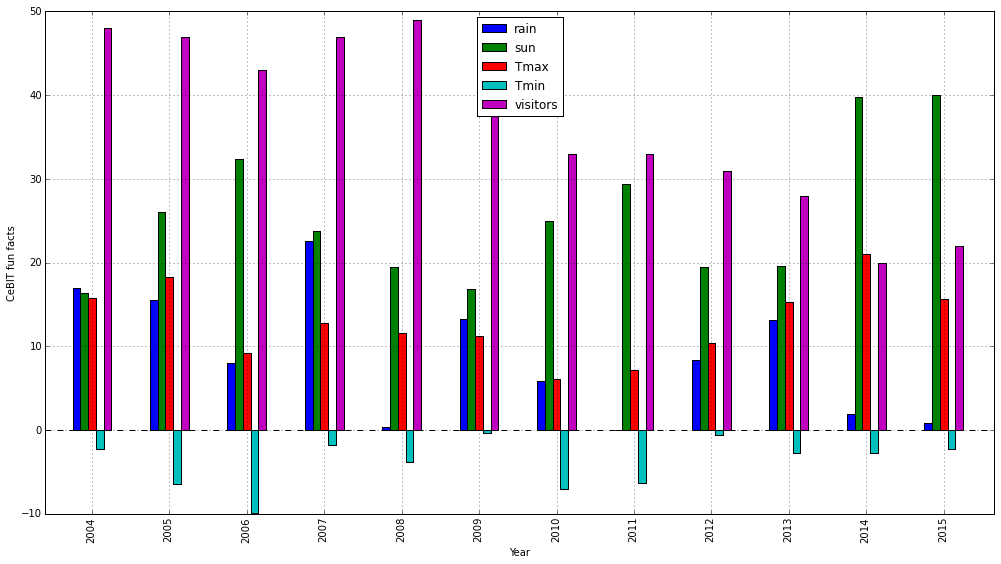

In [10]:
print "Our final plot shows the visitor and weather data in context - any relationship?"
vis1=visitor_df[['YEAR','RAIN','SUN','TMAX','TMIN','VISITORS1']]
vis1['VISITORS1']=vis1['VISITORS1'].apply(lambda x: int(x*0.0001))
ax = vis1.plot(kind='bar', figsize=(17,9), x='YEAR', legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, ['rain','sun','Tmax','Tmin','visitors'], loc='upper center')
ax.set_ylabel("CeBIT fun facts")
ax.set_xlabel("Year")

In [2]:
import pyowm

owm = pyowm.OWM('6a6a0ade20e004982da11c132a6e0397')


# Search for current weather
observation = owm.weather_at_place('Brussels,be')
w = observation.get_weather()
print "Weather in Brussels:"
print w.get_temperature(unit='celsius')
print w.get_detailed_status()
print "\nForecast for Brussels:"

fc = owm.three_hours_forecast('Brussels,be')
f=fc.get_forecast()
for weather in f:
      print (weather.get_reference_time('iso'),weather.get_detailed_status(),weather.get_temperature(unit='celsius')['temp'])
        

Weather in Brussels:
{'temp_max': 17.78, 'temp_kf': None, 'temp': 14.78, 'temp_min': 12.78}
mist

Forecast for Brussels:
('2016-06-02 12:00:00+00', u'light rain', 17.31)
('2016-06-02 15:00:00+00', u'light rain', 16.75)
('2016-06-02 18:00:00+00', u'light rain', 15.7)
('2016-06-02 21:00:00+00', u'light rain', 14.37)
('2016-06-03 00:00:00+00', u'light rain', 13.52)
('2016-06-03 03:00:00+00', u'light rain', 13.27)
('2016-06-03 06:00:00+00', u'light rain', 13.71)
('2016-06-03 09:00:00+00', u'light rain', 15.37)
('2016-06-03 12:00:00+00', u'light rain', 17.75)
('2016-06-03 15:00:00+00', u'light rain', 17.94)
('2016-06-03 18:00:00+00', u'moderate rain', 17.68)
('2016-06-03 21:00:00+00', u'light rain', 16.86)
('2016-06-04 00:00:00+00', u'light rain', 15.63)
('2016-06-04 03:00:00+00', u'moderate rain', 14.2)
('2016-06-04 06:00:00+00', u'moderate rain', 14.74)
('2016-06-04 09:00:00+00', u'light rain', 16.4)
('2016-06-04 12:00:00+00', u'moderate rain', 16.63)
('2016-06-04 15:00:00+00', u'moderate